In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Hatim\Downloads\Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<Axes: xlabel='Education', ylabel='count'>

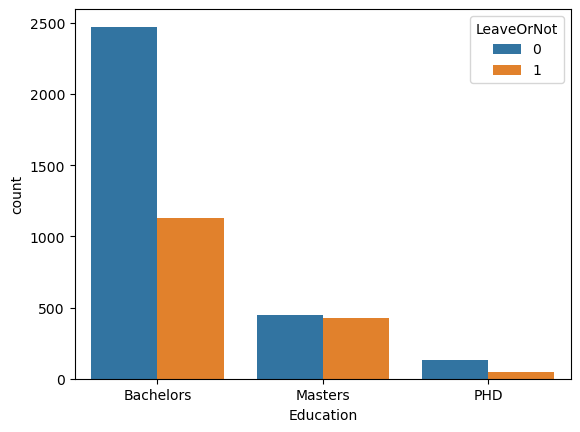

In [4]:
sns.countplot(x='Education',hue='LeaveOrNot',data=df)

In [5]:
df.groupby('LeaveOrNot')
df1=df[df['Education']=='PHD']

#df['Education'].value_counts()

<Axes: xlabel='Gender', ylabel='count'>

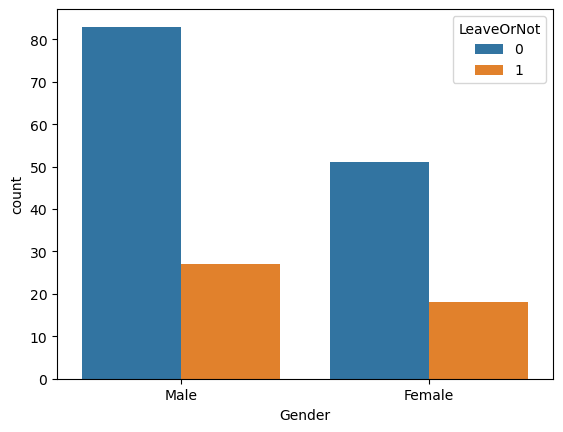

In [6]:
sns.countplot(x='Gender',hue='LeaveOrNot',data=df[df['Education']=='PHD'])

In [7]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

<Axes: xlabel='City', ylabel='count'>

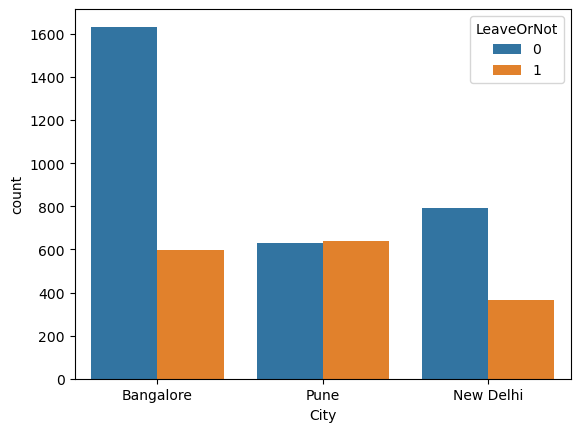

In [8]:
sns.countplot(x='City',hue='LeaveOrNot',data=df)

In [9]:
le=LabelEncoder()
df[['Education','City','Gender','EverBenched']]=df[['Education','City','Gender','EverBenched']].apply(le.fit_transform)

In [10]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [11]:

df.isna().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [12]:
X=df.drop('LeaveOrNot',axis=1)
y=df['LeaveOrNot']

<Axes: xlabel='LeaveOrNot', ylabel='count'>

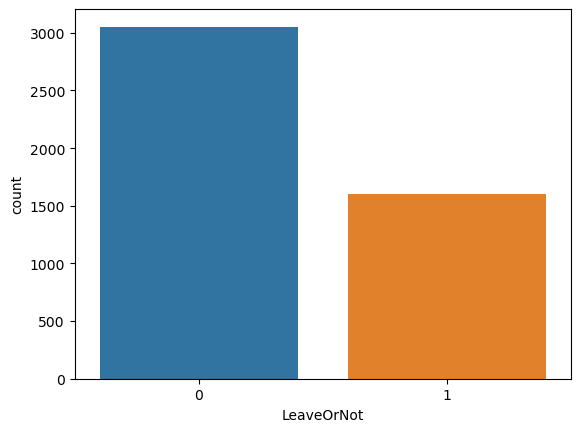

In [13]:
sns.countplot(x='LeaveOrNot',data=df)

<Axes: xlabel='Education', ylabel='count'>

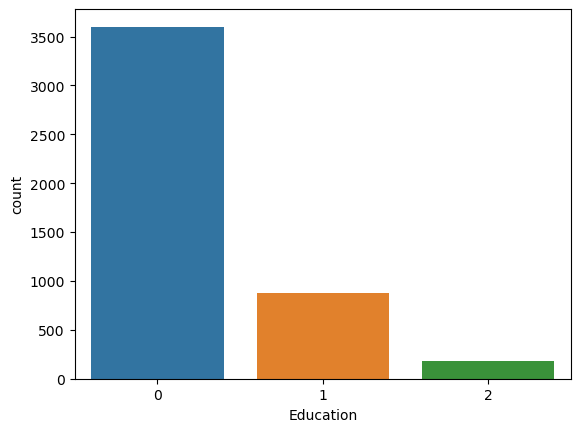

In [14]:
sns.countplot(x='Education',data=df)

In [15]:
def results(y,prd):
    accuracy = accuracy_score(y,prd)
    precision = precision_score(y,prd,average='macro')
    recall = recall_score(y,prd,average='macro')
    f_score=f1_score(y,prd,average='macro')
    print(classification_report(y,prd))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f-Score:", f_score)
    return

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [17]:
#Logistc Regression
lr=LogisticRegression(max_iter=1000)

model=lr.fit(X_train,y_train)
pred=model.predict(X_test)
#print(accuracy_score(y_test,pred))
#print(model.coef_)
results(y_test,pred)

              precision    recall  f1-score   support

           0       0.74      0.89      0.80       604
           1       0.67      0.41      0.51       327

    accuracy                           0.72       931
   macro avg       0.70      0.65      0.66       931
weighted avg       0.71      0.72      0.70       931

Accuracy: 0.7207303974221267
Precision: 0.7006441834028041
Recall: 0.6501306276201471
f-Score: 0.657119383534478


In [18]:
#Decision Tree
dtree=DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

#tree.plot_tree(dtree,feature_names=df.columns)
accuracy_score(y_test,pred)


0.8109559613319012

In [19]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2
